In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./output_csv/keypoints_activity_v11s.csv")

In [3]:
print(data.columns.tolist())
data.head()

['kp0_x', 'kp0_y', 'kp1_x', 'kp1_y', 'kp2_x', 'kp2_y', 'kp3_x', 'kp3_y', 'kp4_x', 'kp4_y', 'kp5_x', 'kp5_y', 'kp6_x', 'kp6_y', 'kp7_x', 'kp7_y', 'kp8_x', 'kp8_y', 'kp9_x', 'kp9_y', 'kp10_x', 'kp10_y', 'kp11_x', 'kp11_y', 'kp12_x', 'kp12_y', 'kp13_x', 'kp13_y', 'kp14_x', 'kp14_y', 'kp15_x', 'kp15_y', 'kp16_x', 'kp16_y', 'kp17_x', 'kp17_y', 'kp18_x', 'kp18_y', 'kp19_x', 'kp19_y', 'kp20_x', 'kp20_y', 'kp21_x', 'kp21_y', 'kp22_x', 'kp22_y', 'label']


,kp0_x,kp0_y,kp1_x,kp1_y,kp2_x,kp2_y,kp3_x,kp3_y,kp4_x,kp4_y,...,kp18_y,kp19_x,kp19_y,kp20_x,kp20_y,kp21_x,kp21_y,kp22_x,kp22_y,label
0,242.26190,235.43506,232.47087,230.92711,238.88330,225.35612,234.01470,236.27512,225.55386,231.24887,...,214.26196,200.26804,209.80414,202.41269,185.71650,216.54747,165.75350,240.85751,158.72730,grooming
1,242.16975,235.12062,232.59666,230.75040,238.93994,225.17096,234.21187,236.04510,225.73503,231.18646,...,214.13683,200.20929,209.62546,202.40654,185.35724,216.86862,165.32630,241.57068,158.26740,grooming
2,242.80298,235.21858,232.84505,230.83195,239.32144,225.19347,234.43575,236.14145,225.88782,231.21313,...,213.95734,199.97147,209.20892,202.26602,184.73616,217.17456,164.79408,242.57903,158.05882,grooming
3,242.03438,235.35550,231.95700,230.95518,238.39366,225.32587,233.61592,236.21179,225.05060,231.24628,...,213.98416,199.42560,209.33167,201.64935,185.05860,216.44366,165.26451,241.82953,158.52774,grooming
4,241.39919,235.14207,231.63634,230.80797,237.94846,225.35340,233.36699,236.04837,224.82384,231.00159,...,214.23245,199.81787,209.25644,202.22781,185.37482,216.62198,165.50993,241.03984,158.60320,grooming


In [4]:
print(data['label'].value_counts())

label
grooming      3720
standing      3270
scratching     756
Name: count, dtype: int64


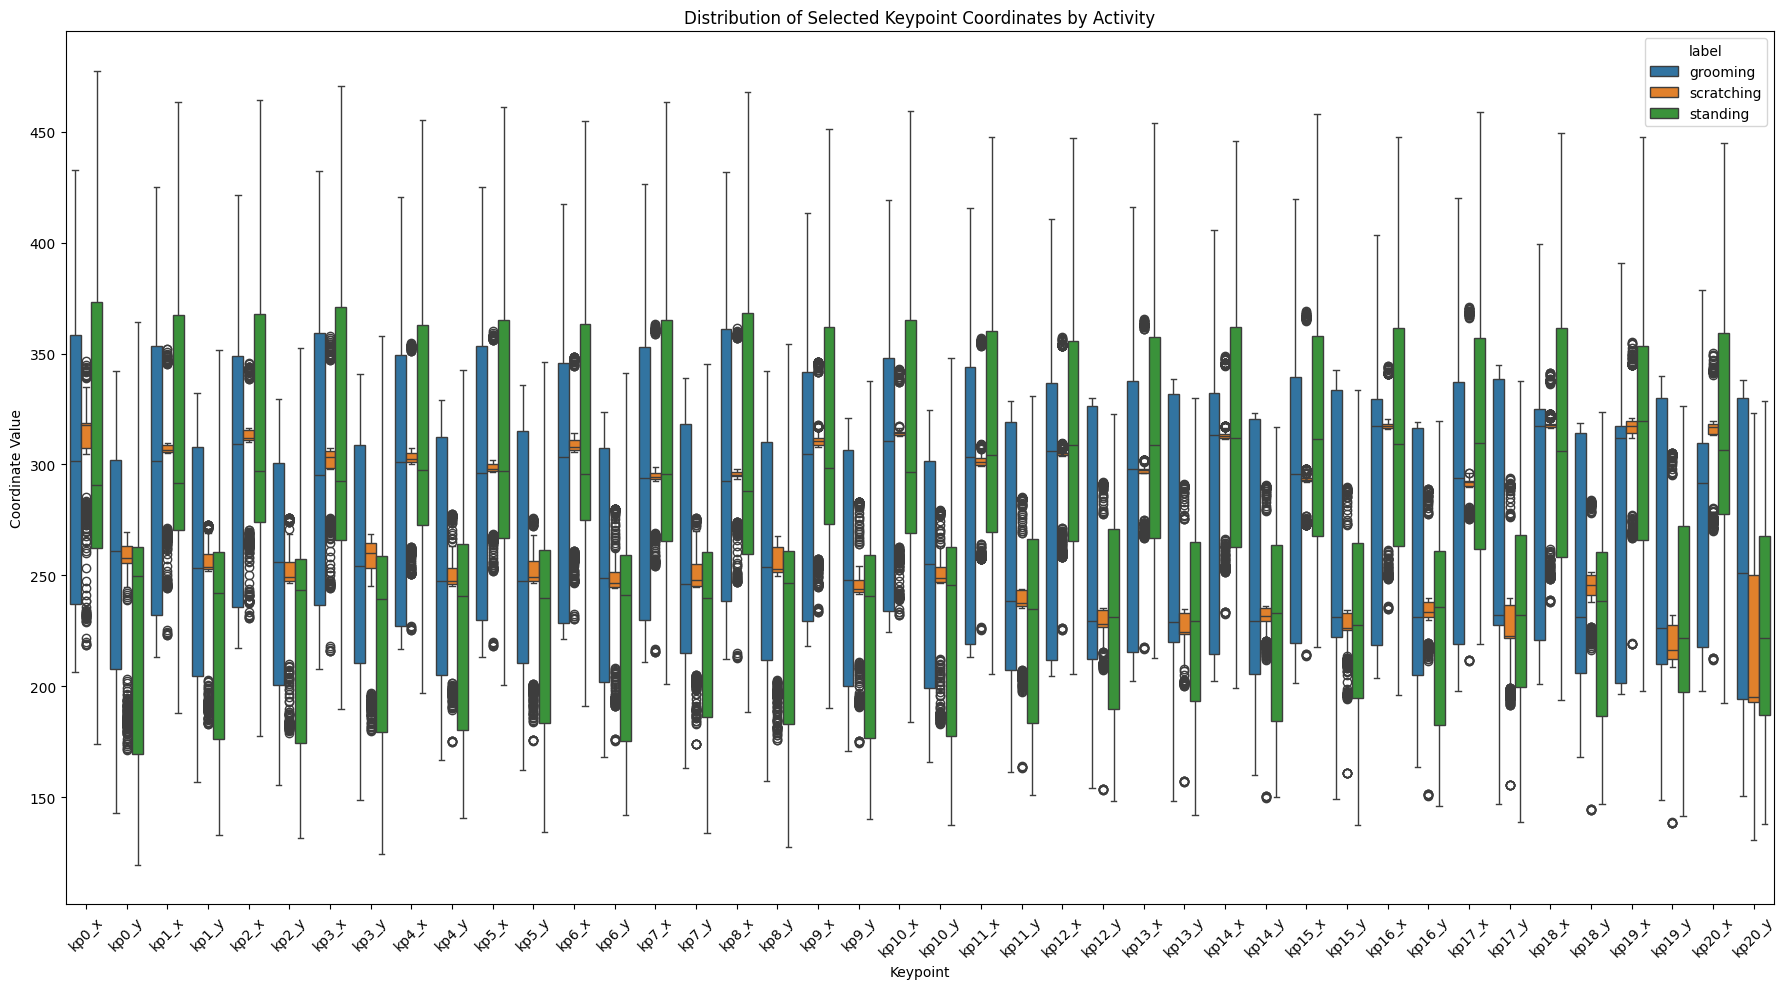

In [6]:
# Create a boxplot to visualize feature distribution by class
df_long = data.melt(id_vars=['label'], var_name='keypoint', value_name='value')

# Separate x and y coordinates
df_long['coord_type'] = df_long['keypoint'].apply(lambda x: 'x' if '_x' in x else 'y')
df_long['keypoint_id'] = df_long['keypoint'].apply(lambda x: x.split('_')[0])

# Visualize a few keypoints to avoid a cluttered plot
selected_keypoints = ['kp0','kp1','kp2','kp3','kp4','kp5','kp6','kp7','kp8','kp9','kp10','kp11', 'kp12','kp13','kp14','kp15','kp16','kp17','kp18','kp19', 'kp20', 'kp21' 'kp22']
df_filtered = df_long[df_long['keypoint_id'].isin(selected_keypoints)]

# Create a boxplot for x and y coordinates of selected keypoints
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_filtered, x='keypoint', y='value', hue='label')
plt.title('Distribution of Selected Keypoint Coordinates by Activity')
plt.xlabel('Keypoint')
plt.ylabel('Coordinate Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21168\2895635206.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


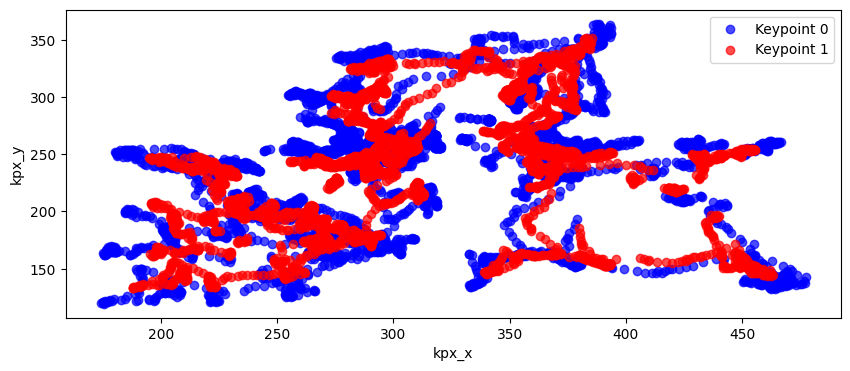

In [7]:
x1 = data["kp0_x"]
y1 = data["kp0_y"]

x2 = data["kp1_x"]
y2 = data["kp1_y"]

fig, axes = plt.subplots(1, 1, figsize=(10, 4))

axes.scatter(x1, y1, color='blue', alpha=0.7, label="Keypoint 0")
axes.set_xlabel('kpx_x')
axes.set_ylabel('kpx_y')

axes.scatter(x2, y2, color='red', alpha=0.7, label="Keypoint 1")
axes.set_xlabel('kpx_x')
axes.set_ylabel('kpx_y')

axes.legend()
fig.show()